<a href="https://www.kaggle.com/code/iainmcintosh/project-pump-an-a-i-enabled-skateboard-tutor?scriptVersionId=134157805" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://drive.google.com/uc?id=1qo0RbisvP4QRsST64YKpG0qkCv37aQt8" width="250">





# WELCOME TO PROJECT PUMP


**WHAT IS THE PURPOSE OF PROJECT PUMP?**

The purpose of Project Pump is to create a machine which can help people learn to 'pump' on a skateboard or other means of human powered transportation.

I would like to do this, as it is not a widely known skill and it is hard to learn. If I can help teach people to pump, they can enjoy a range of healthy sports. Some of these such as foiling or long distance pumping are low impact on the joints, extremely fun and a great work out. These sports are also relaxing, fun and good for the mind.

**WHAT IS THE MVP ?**

* A proof of concept would be a machine that can predict when a user should 'pump' on a given transition
* It will use two cell phones to transmit their accelerometer infomation in real time to a laptop using a wireless hotspot
* The laptop will be running a program to capture both data streams from the remote senors
* A model will then be trained on the data which can predict in real-time when the user should 'pump'
* The MVP will be trained on a small half pipe with minimal flat. I beleieve that is optimal as I have a steady signal and changing signal from both sensors.

The concept could be applied to a wider field including:

* Foil boarders in water who pump their boards to create the energy needed to move forward
* Long boarders who practice long distance pumping
* Surf skaters
* Roller bladers and traditional skaters
* Snow boarders and skiers who may wish to minimize or maximize their energy inputs from changes in elevation
* Surfers who pump to gain energy on the waves whilst surfing
* BMX riders who ride on pump tracks, bowls, half pipes or anywhere else


**WHAT IS PUMPING?**

The definiton varies depending on the sport it applies to. Wikipedia has the following entry...

"Pumping is a skateboarding technique used to accelerate without the rider's feet leaving the board. Pumping can be done by turning or on a transition, like a ramp or quarter pipe. When applied to longboards, it is also known as Long distance skateboard pumping or LDP. Pumping is a technique similar to pumping a surfboard."

https://en.wikipedia.org/wiki/Pump_(skateboarding)

Further links below

[Pump a ramp tutorial - Braille skateboarding](https://youtu.be/5QsCWEE8hBQ)

[Pump a surfskate tutorial - Shane Lai](https://www.youtube.com/watch?v=VSyQdAKwVBw&list=PL9JmGQcQB2hhu7eq0OmDo4cqepU-ag-rF)

[Learn to pump on a pump track - Jon Bishop](https://youtu.be/QtRQ8SRW1oI)

**OVERVIEW OF THE MACHINE**

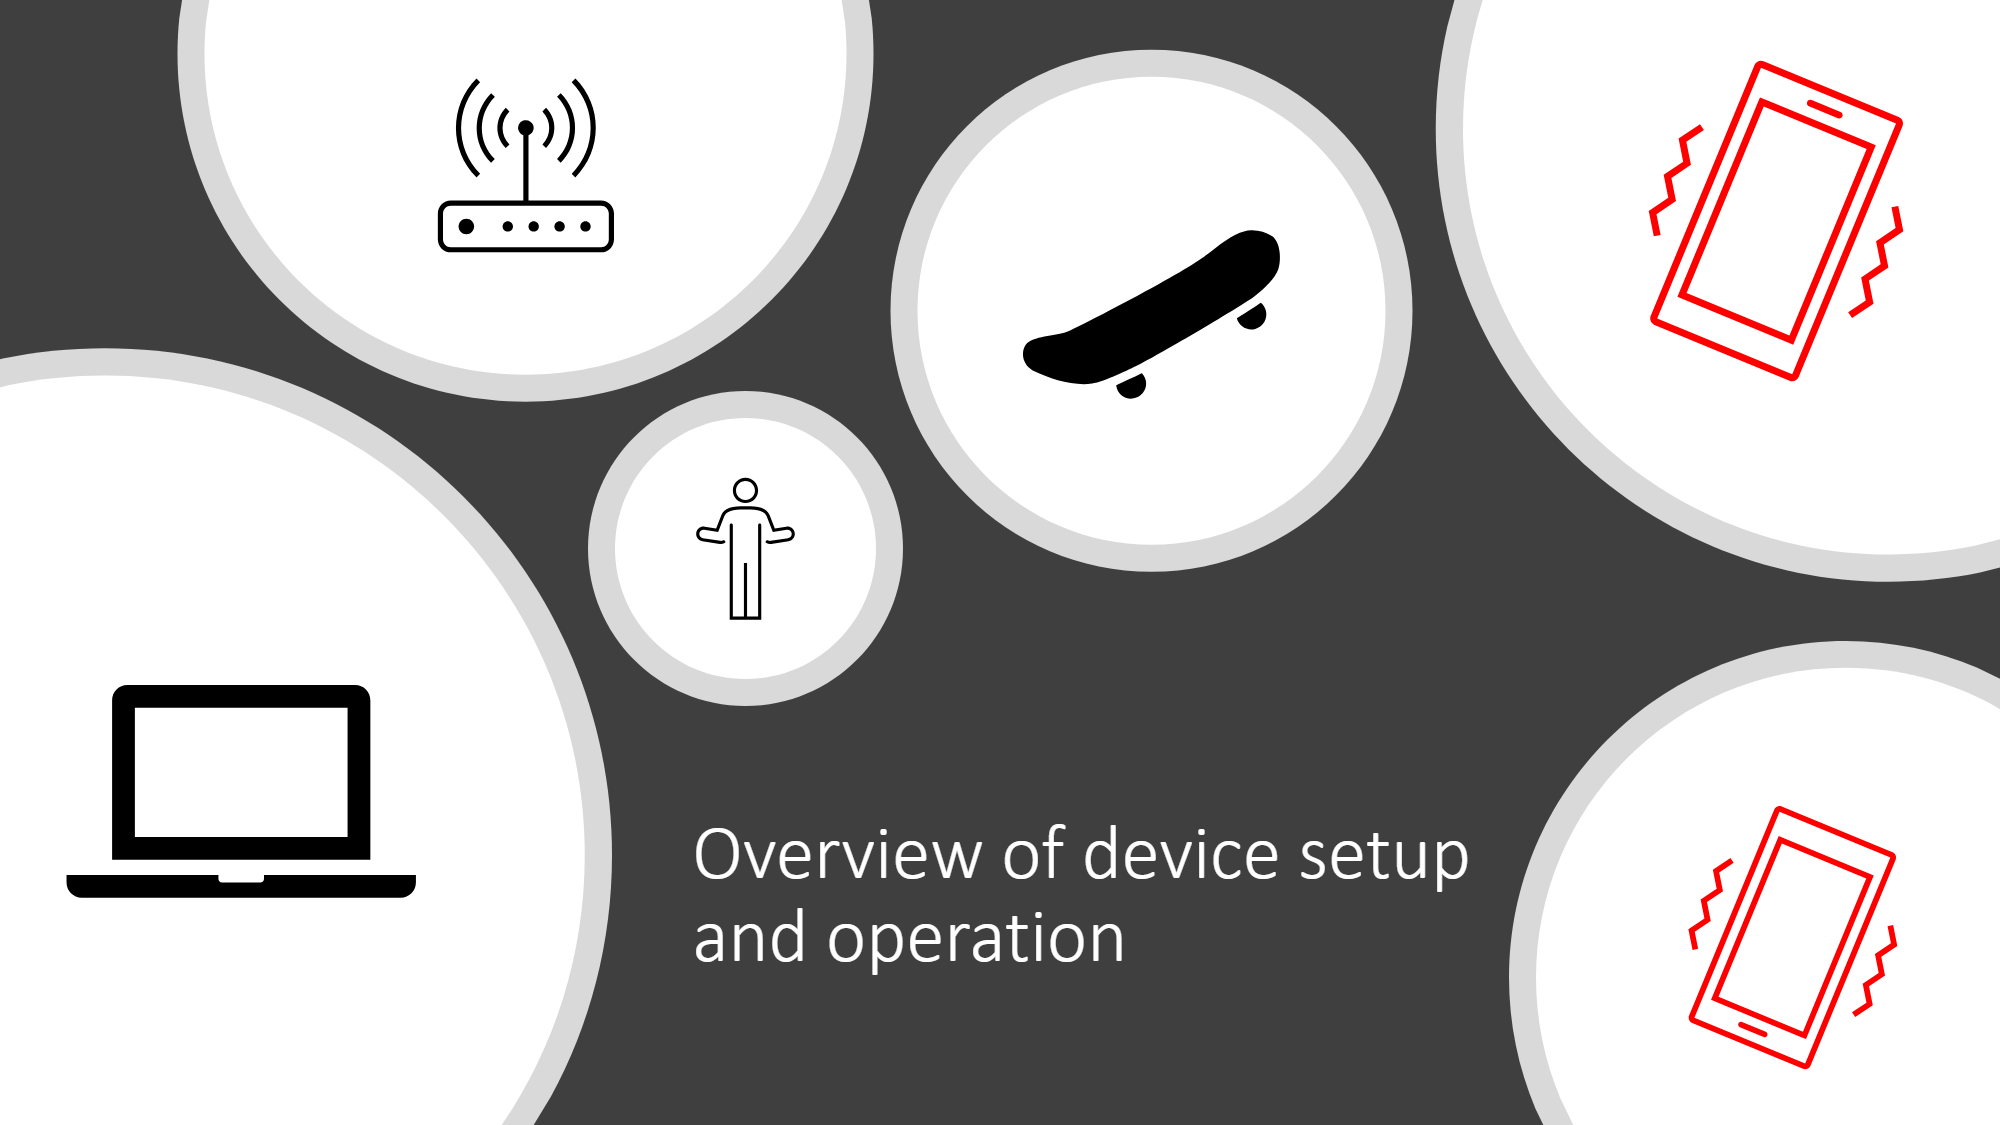

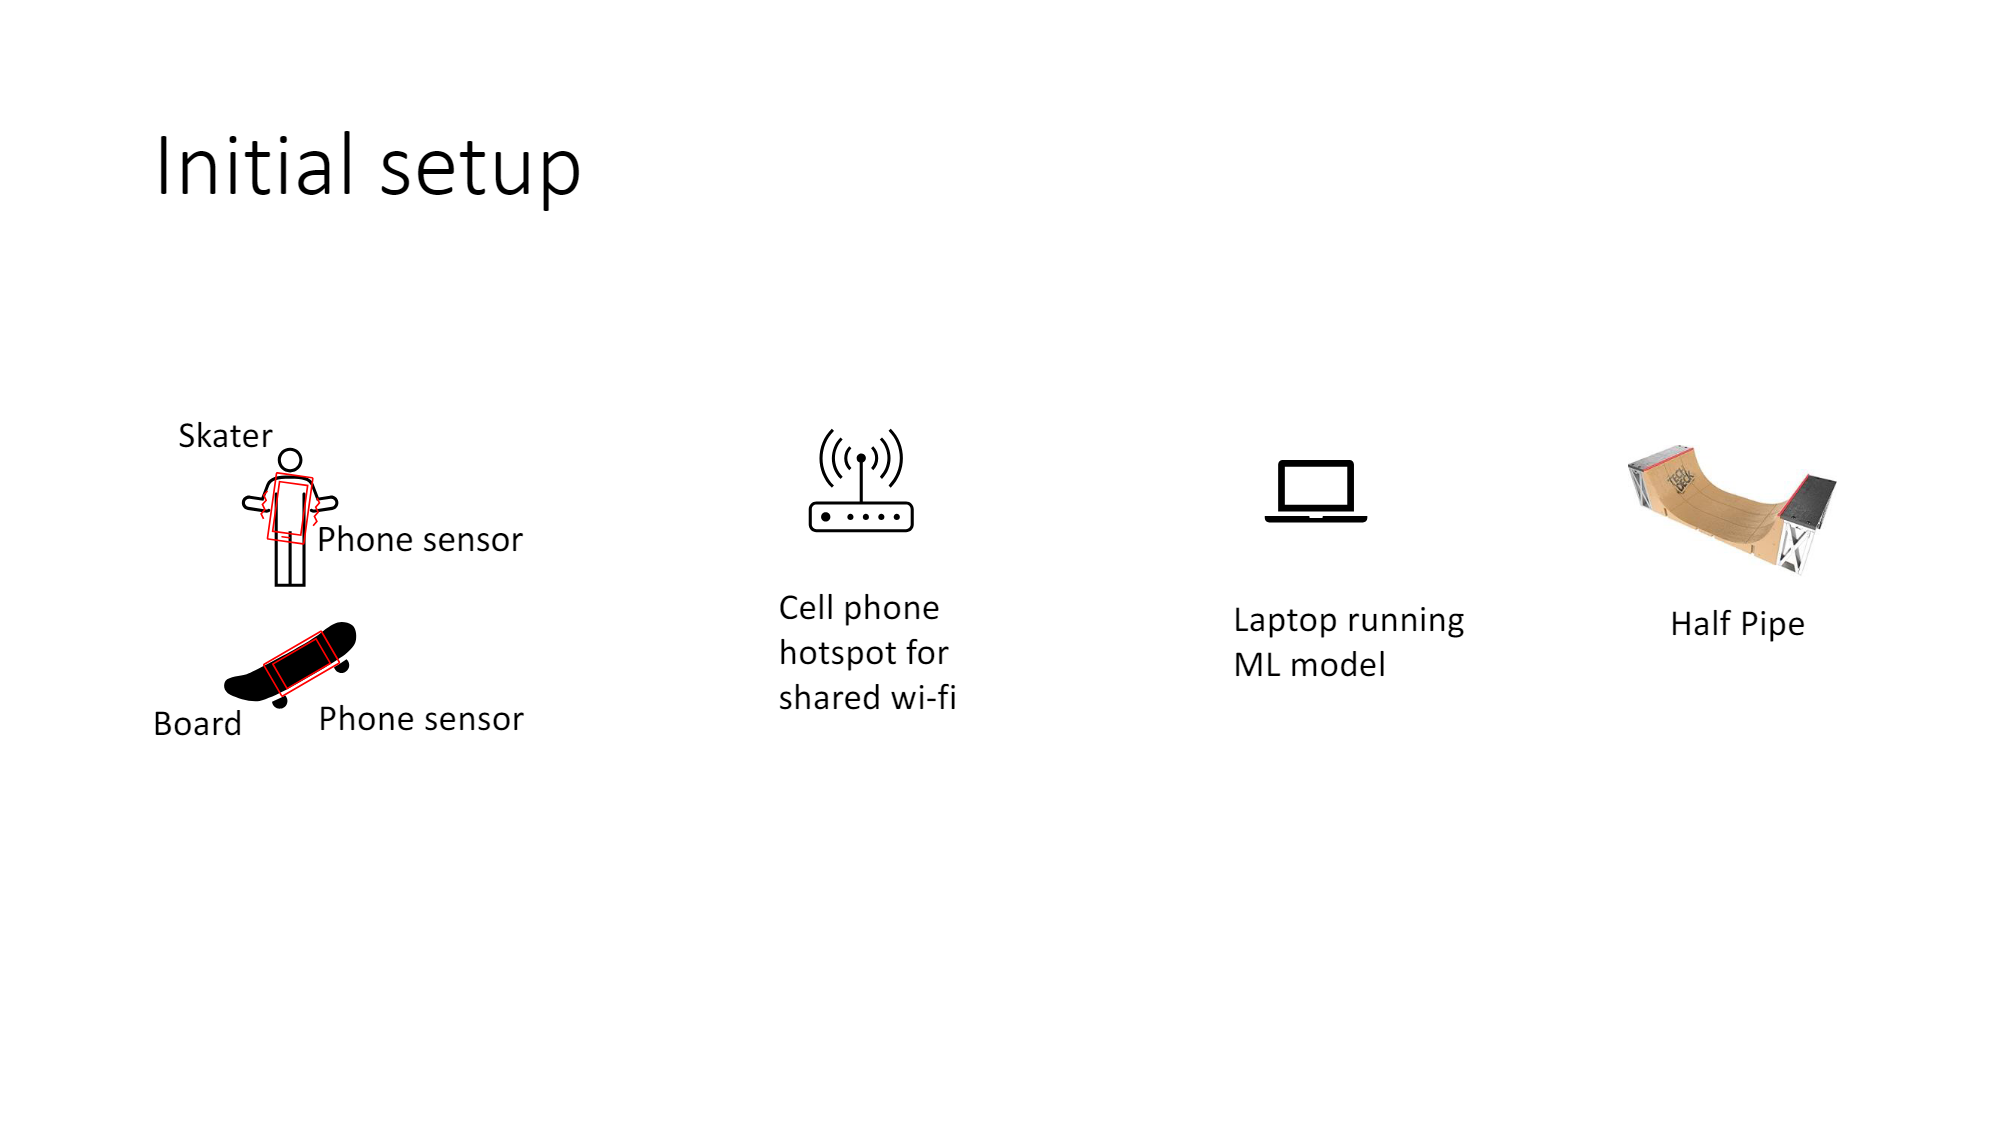

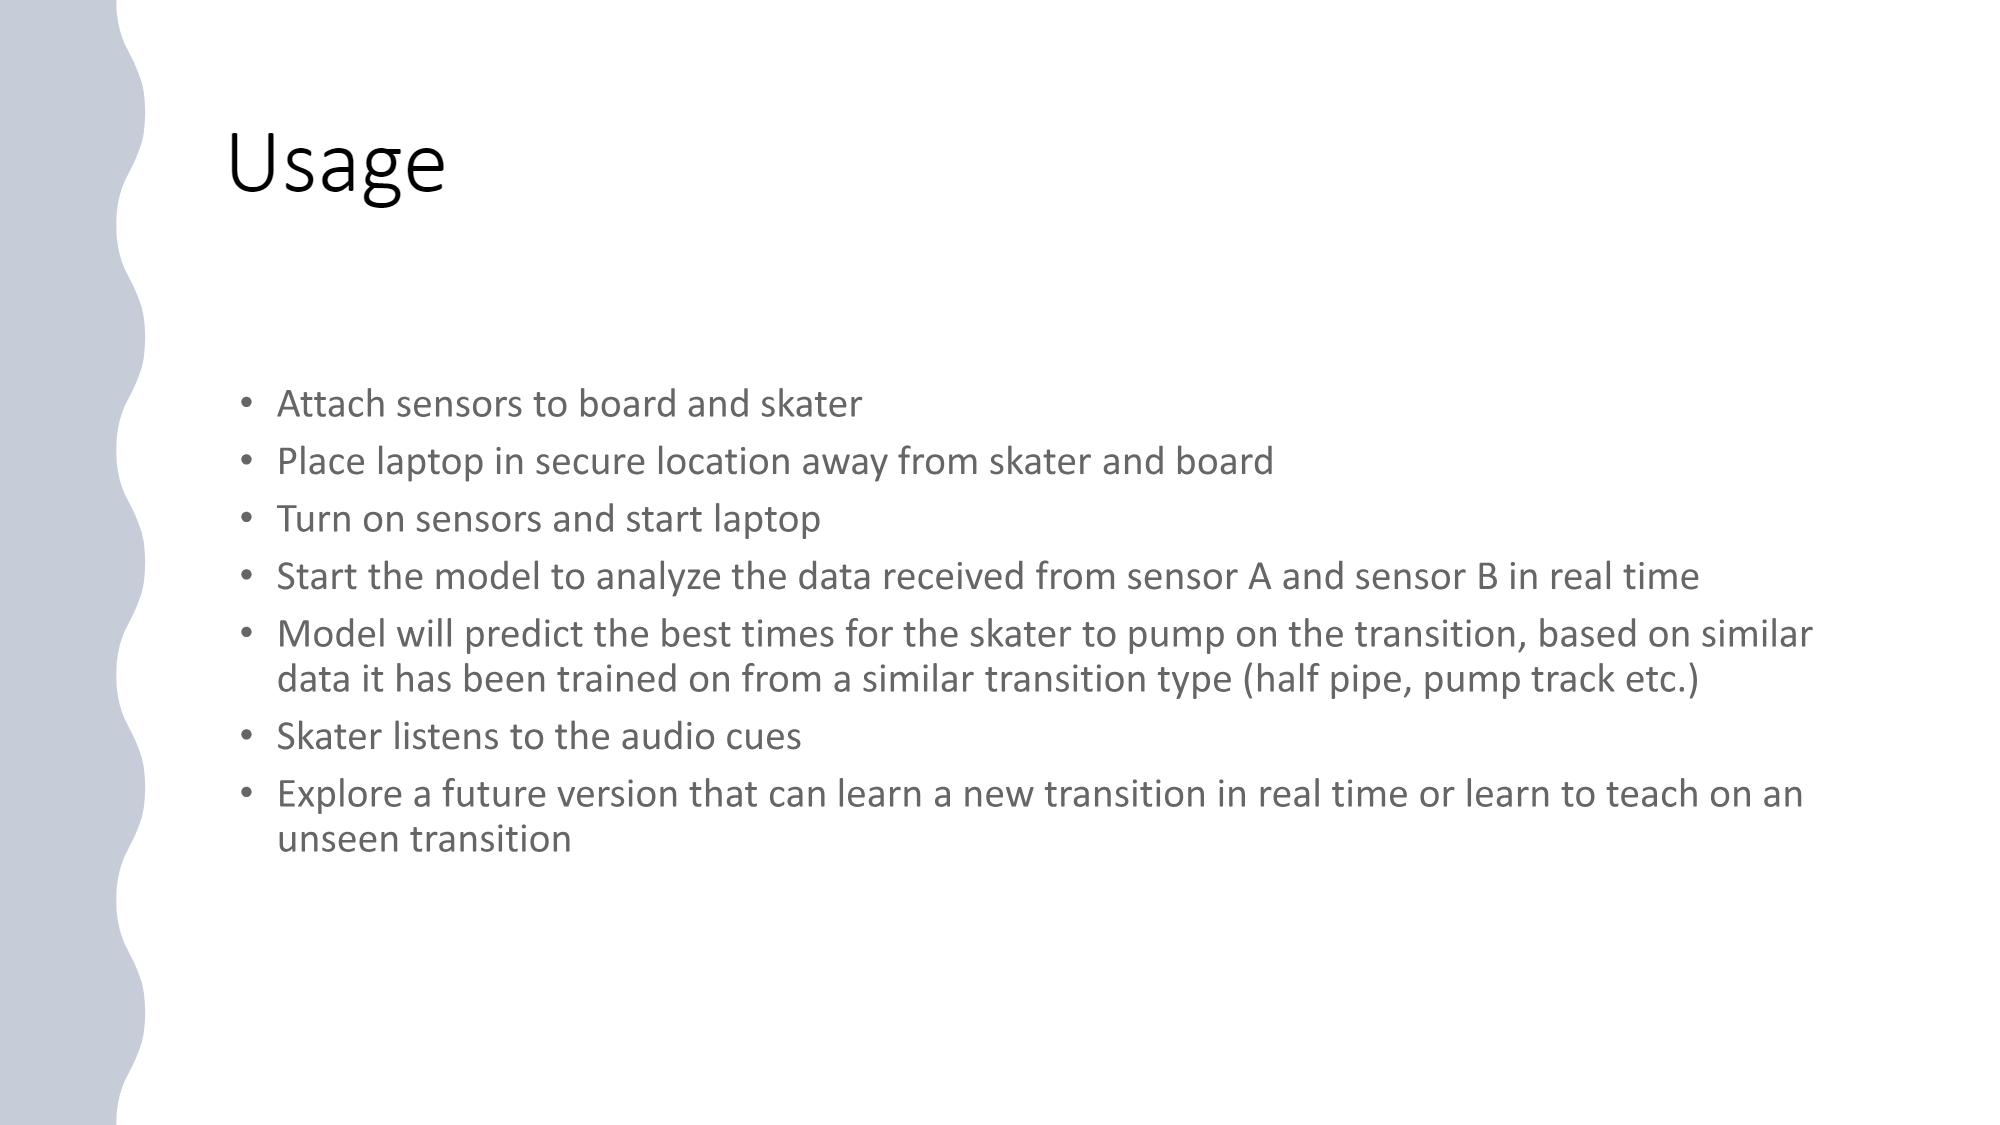

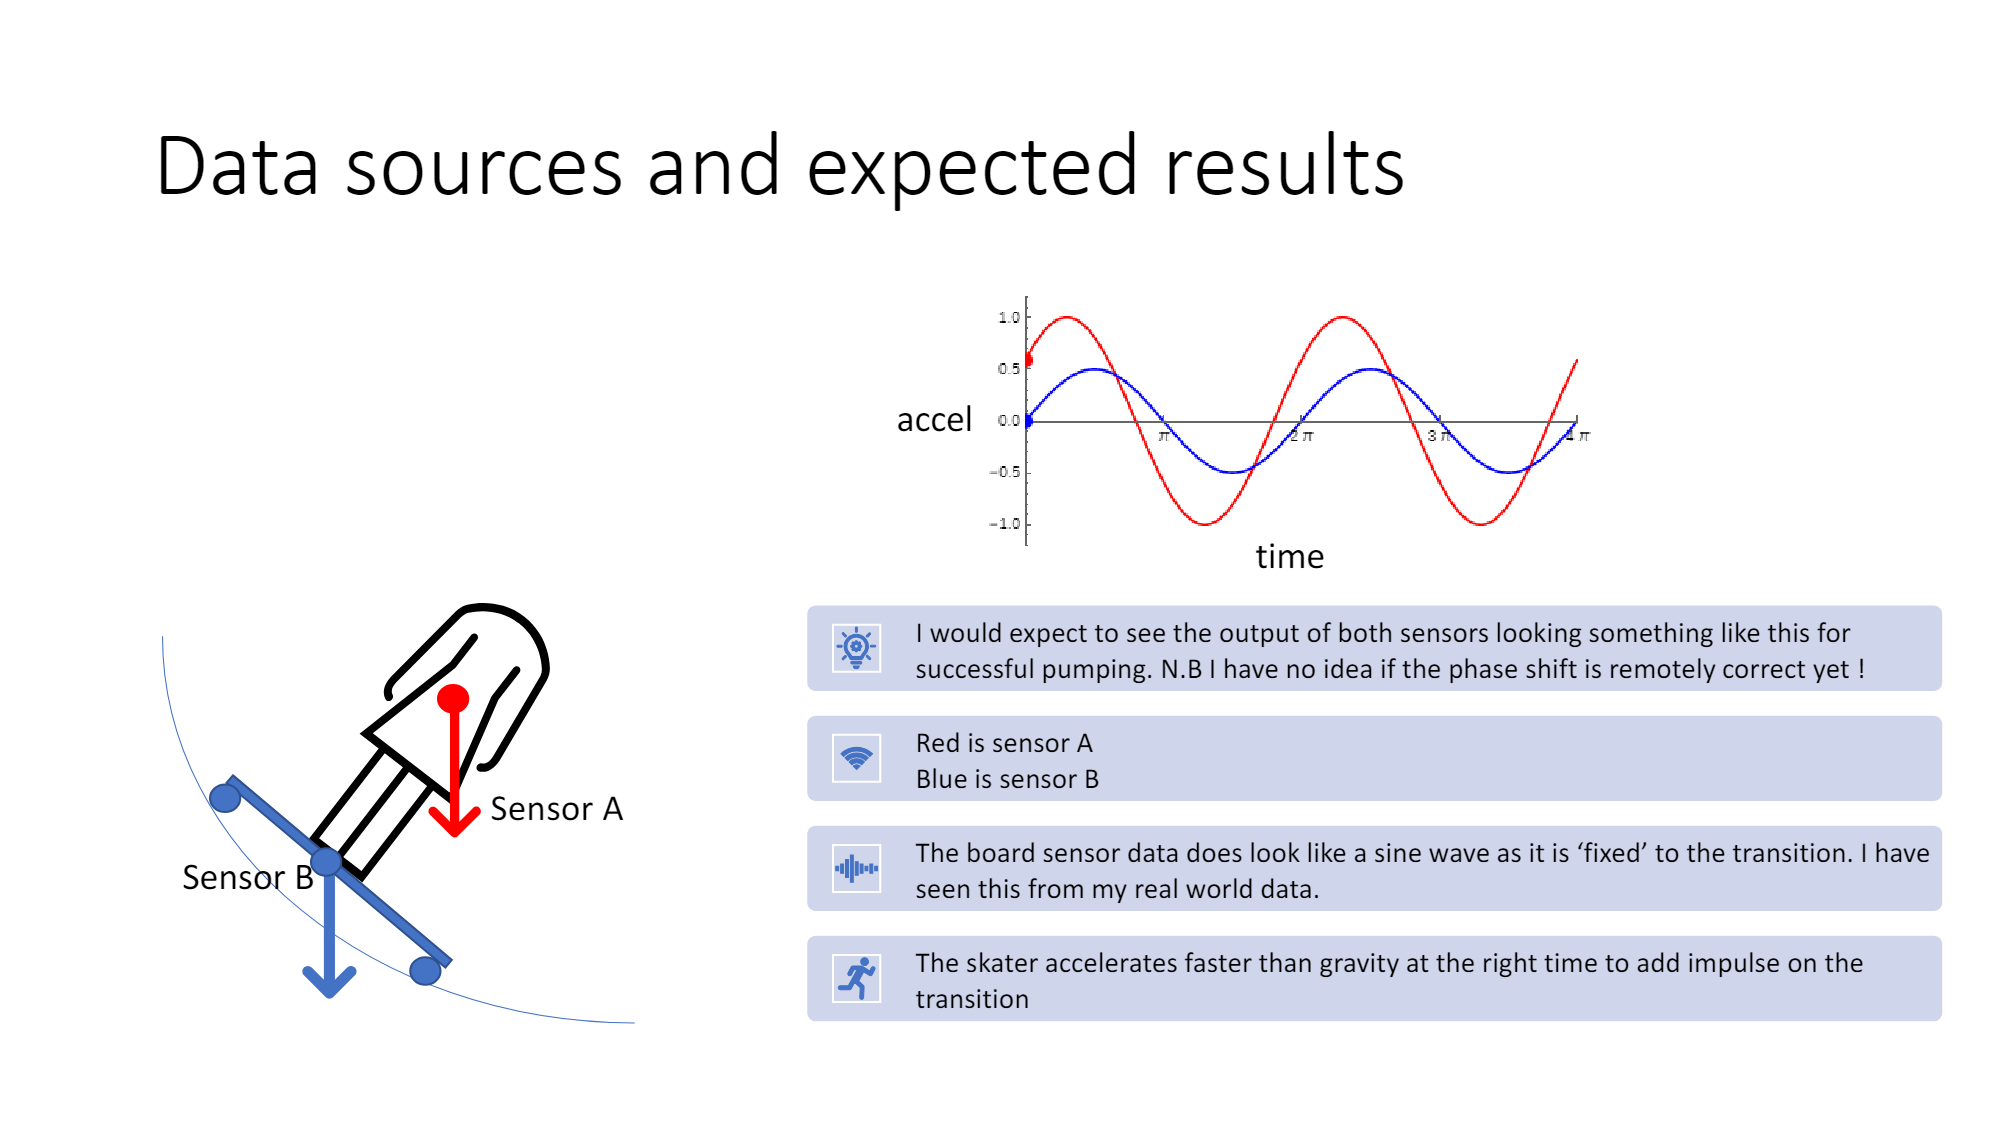

In [1]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/slides/intro.png'))
display(Image(filename='/kaggle/input/slides/initialsetup.png'))
display(Image(filename='/kaggle/input/slides/usage.png'))
display(Image(filename='/kaggle/input/slides/datasources.png'))

**HOW WOULD THE MACHINE WORK ?**

This describes a machine which can train users to pump on a standard half pipe, whilst standing on a skateboard. 

The machine would comprise two sensors
* One sensor is worn by the skater in the upper area of their body
* One sensor is attached to the centre of the skateboard

The sensors would record the following
* Time
* Accleration
* Inclination
* Compass (optional)
* GPS (optional)

Hardware required
* 2 x Android phones as sensors
* 1 x Wi-fi hotspot
* 1 x Laptop to receive data and process information

The machine would receive real time information from both sensors and use machine learning to determine the optimimum time to pump and how fast to do so

The mechanism would be for the machine to compare accelerometer data from both sensors and predict the best time to 'pump' and how fast to do so, to maximize energy gain by the skater.

The feedback could be given in the form of an audio tone. It would rise and fall in the human audible range to indicate the desired body positon and rate of change.

As an example, the process would be as follows for a half pipe and a skateboarder.

* The skater starts on the flat moving towards the transition. The program knows to tell the skater to crouch, then spring up at the right time, based on a model which has been trained to optimize the time for the user to 'pump' i.e. move the their body up or down (left or right) so as to optimize for the target result.

* The program calculates the optimum time for compressing and uncompressing on the transiton as the cycle repeats. It will be trained on data from multiple real-life runs, where the target will be the duration for the skater to return to their original position. I have selected that metric, as the longer it takes a skater on a half pipe to come back to the start point, the higher the amount of energy they have added. That may not hold true for all instances of instances of 'pumping', however I am confident it holds true for a skater on a half pipe.

* A seperate program will need to be written to label datasets with the duration between returning to the peak of the previous pump.

* The reset time for each cycle is when the g force sensor on the approiate plane switches from +ve to -ve.

* For the half pipe example that is for the vertical acceleration.

* To train the model, I will need to transform the data into an array of cycles.

* This would take the form of a pandas array as below

**WHAT DATA IS NEEDED TO CREATE A MODEL**

For a half pipe the data elements required to build a model which can predict when to pump using accelerometers are:-

From Sensor A - Mounted on the users chest
Timestamp
Accelerometer data (x,y,z)

From Sensor B - Horizonatally board mounted
Timestamp
Accelerometer data (x,y,z)

This is reliant on having a high enough motion capture rate. I currently have 5 data points per second, which I don't feel is quite fast enough. It is also difficult to setup and I have to use duct tape to mount the sensors to my body !

I have created a notebook to model how the data might look [here](https://www.kaggle.com/code/iainmcintosh/project-pump-labeled-cycles).

I have come to learn of algorithms which can track postions on videos in a very detailed way and are able to also carry out depth perception analysis. I believe this could be a much better way to solve the problem, as the data capture is more direct or maps almost exactly to a mountain cart type problem and it allows a more powerful processor than a cell phone to be used if required. i.e. a laptop with a camera attached.

I was in contact with [Qianqian](https://www.cs.cornell.edu/~qqw/) from https://omnimotion.github.io/ who gave me some feedback and made me aware of https://deepmind-tapir.github.io/ which could be ideal. She gave me excellent advice on some other aspects such as whether I needed pixels or accuracte measurements. I think pixels are fine as the scale of a mountain cart type problem doesn't matter.

The data elements required to build the model which can predict when to pump using streaming video are:-

Timestamp
Skater head position
Board position

There is the opportunity to add multiple tracking points (shoudlers, knees, arms, even every single pixel of the skater !!!) using these new image models which could result in really enhanced feedback to the rider on their optimal body postion. I am thinking of gymnasts, divers or other athletes who need to move in exactly the right way to enhance their performance.

Video is easily available and can have extremely high frame rates, it will be more precise as well. The cameras are really great on modern cell phones.

I have included a video below, which is from the Omnimotion project website. It helps visulize the problem.

In [2]:
from IPython.display import HTML
from base64 import b64encode

def play(filename):
    html = ''
    video = open(filename,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=1000 controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

play('/kaggle/input/kangaroo-view-from-omnimotion/kangaroo.mp4')

**HOW TO SETUP ANY NUMBER OF CELL PHONES AS G-FORCE SENSORS AND STREAM THAT DATA TO A LAPTOP VIA A WIRELESS HOTSPOT. DATA IS SAVED TO FILE**

To setup the cell phones to record data to a laptop, you can follow the steps below. The code is far from perfect however this should work. If you attempt this and get stuck then please let me know as I might be able to help.

Wifi Setup
1. Enable a WiFi hotspot on your cell phone and connect all devices to that

Android cell phone setup
1. Connect the cell phone to the WiFi hotspot

2. Download and install QPython 3L - Free, tiny and very fast to download

3. Modify the client code on the phone with the IP address of the laptop you will be using. Find this by running IPCONFIG.

4. Load the code into the QPython 3L program get it ready to run. This is easy, click the edit button and paste in the code, save and then press the play / run button when you are ready

Repeat the steps above for both phones

Laptop setup
1. Connect the laptop to the WiFi hotspot
2. Modify the server code with the IP address of the laptop you will be using
3. Run the code on the laptop and run the code on both the cell phones
4. Press any button to start recording
5. Skate
6. Return and press q to quit and save the data

If you record any real world data please upload and share it on Kaggle so we can use it for analysis !

**CAN YOU HELP THE PROJECT ?**

My intention is to create this machine and other variants and for them to be fully open source, with published 'how to' guides for anyone who is interested in making them.

If you are interested in helping to make this a reality, do not hestiate to get in touch with me at iainmcintosh@gmail.com

It would be great to have help with any of the following:

* Python programming
* Data science and Machine Learning
* Datasets from real skaters in skateparks
* Business Analyst type activities such as helping to help write documentation and publish 'how to' guides
* 3D Printed mounts or cases to hold / protect the phone on the board and body

The github page containing all the Python code is located [here](https://github.com/iainonline/projectpump)

I will list any and all contributors to the project.

**JUN 19,2023**

I have updated the data requirements section to reflect the new thinking on using video annotation to gain the data for analysis. It is really exciting and should simplify many aspects of the project.

[Omnimotion](https://omnimotion.github.io/)

**JUN 08,2023**

I have made good progress adding a Kaggle [notebook](https://www.kaggle.com/code/iainmcintosh/project-pump-labeled-cycles) whichs labels my simulated data and define the target as the length of the cycle.

I have also learnt about mountain car, which is a classic control environment and mirrors my problem very closely. I will need to explore this further to see if it is of help.

[Link to Gym Library and mountain car](https://www.gymlibrary.dev/environments/classic_control/mountain_car/)

**JUN 03,2023**

Added a new kaggle page [here](https://www.kaggle.com/code/iainmcintosh/project-pump-dataframe-format-and-sample-data) which creates data to mimic a rider on a half pipe, approximating too a sine wave, with an x second offset
The intention is to use this data to train a model as part of the POC
I can then attempt to train using the live data, once I prove the model can see a signal between the two sensors.

**MAY 31,2023**

Published code on [github](https://github.com/iainonline/ProjectPump having cleaned it up and made some small improvements

I have been to the skate park and recorded real live data. A kaggle notebook for that can be seen at the link below

https://www.kaggle.com/code/iainmcintosh/project-pump-real-world-data-from-a-skate-park

Testing on a wedge transition has made me think that a very tight half pipe will be an excellent testing
ground and can likely give me improved data to work with.


**APR 20, 2023**

I haven't been working on the project at all recently. Today I learnt about Temporal Abstraction as part of my AI Apprenticeship. I believe I can use that to help solve this problem. I had become a bit stuck.

I need to record more data at the skate park and link to a timestamped video to help me understand the data. I believe the data from a large bowl or half pipe is going to be less difficult to analyze due to the longer duration of the pumping event. The surfskate motion is quite sudden and propably will not correlate as closly as the vertical ramp style pumping motion.

**JAN 30, 2023**


I debugged my code for data collection and was able to collect real time data

I wrote a Kaggle notebook [here](https://www.kaggle.com/code/iainmcintosh/exploratory-data-analysis-on-sensor-data) for the Exploratory data analysis. I was very pleased with the results which included some 3D plots such as the one below !

* new code is at the Git Hub Repository here
    * [ProjectPump](https://github.com/iainonline/ProjectPump)

**3D Plot of acceleration in x,y,z dimensions from body mounted cell phone over time (represented by color) **
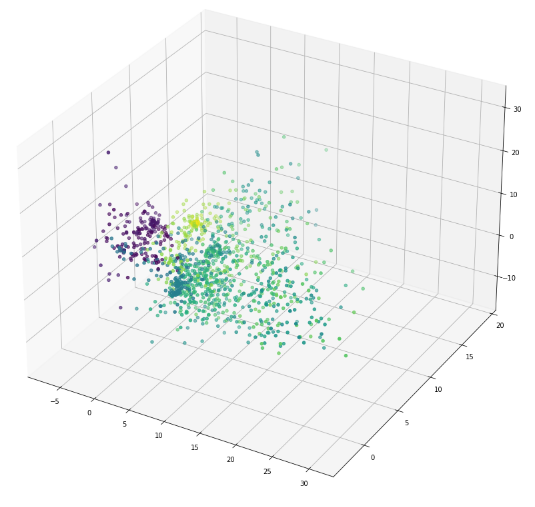






The plot above shows the acceleration over time from the body sensor, strapped vertically flat to center of chest
The data was taken from a 10 meter flat run, using a standard side to side surf skate pumping motion. The chest is essentially rotating through ~ 160 degrees and back again.

**DEC 21, 2022 - JIRA AGILE PROJECT BOARD SETUP**

If you see any tasks you would like to help with, then please get in touch

[Project Pump - JIRA Agile Project Board](https://projectpump.atlassian.net/jira/software/projects/PPIEST/boards/1)

**DEC 20, 2022 - WROTE HOW TO SETUP THE DEVICES TO RECORD DATA**

**DEC 04, 2022 - RETURN TO THE SKATEPARK**

I went skating with my wife today. We longboarded in the parking lot vs skating in the the skate park as it was very busy. It made me think about whether LDP versus vertical pumping might be a better problem to work on.

Reason's why LDP might be a better problem to solve:

* It is a continous motion - I can create long data sets going round in circles on my street on a surf skate
* Higher probability of success - The test & training data will be almost identical to the 'real life problem'
* Data collection is easy - I do not have to pump a half pipe for hours on end
* 'Training' the user is easier. Horizon pumping is very routine, repetitive and quite fast paced.
* A well timed bleep could be enough to give precise / optimimal training input
* The model should work for both vertical pumping and horizontal LDP as the inputs are not going to change. I will train the model seperately on both data sets (vertical vs horizon)
* Solves a 'harder' problem - I think learning LDP is harder than pumping a transition and it might even feel more epic

Not sure I want to change track at this point however !

**NOV 04,2022 - POC DELIVERED - TWO CELL PHONES TRANSMITTING ACCELERATION DATA IN REAL-TIME TO A LAPTOP VIA A CELL PHONE WIRELESS HOTSPOT**

I tested the  using a wi-fi hotspot from a cell phone for the common wi-fi network and it was successfull !

**NOV 01,2022 - POC DELIVERED FOR TWO DEVICES TRANSMITTING WIRELESSLY TO A LAPTOP**

I managed to use multithreading to send accelerometer data from two phones over Wi-fi to my laptop !!!

This is probably one of the hardest challenges I had to solve, to make the device work. Working code is on the project github site.

**OCT 12, 2022 - POC DELIVERED !
WIRELESSLY TRANSMITTING CELL PHONE ACCELEROMETER DATA DEMONSTRATED**

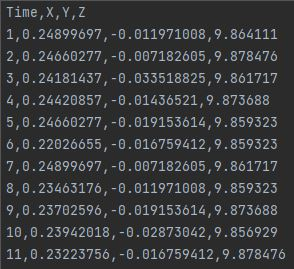

The working code is shown below





      Time         X         Y         Z
0        1  0.248997 -0.011971  9.864111
1        2  0.246603 -0.007183  9.878476
2        3  0.241814 -0.033519  9.861717
3        4  0.244209 -0.014365  9.873688
4        5  0.246603 -0.019154  9.859323
...    ...       ...       ...       ...
1584  1585 -0.093374  0.107739  9.816227
1585  1586 -0.138864  0.088585  9.816227
1586  1587 -0.134075  0.095768  9.832987
1587  1588 -0.102951  0.110133  9.832987
1588  1589 -0.126893  0.090980  9.828198

[1589 rows x 4 columns]


<AxesSubplot:xlabel='Time'>

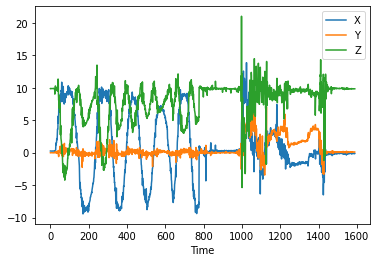

In [3]:
import pandas as pd
data = pd.read_csv("../input/project-pump-first-phone-accel-data/firstdata.csv")
print(data)

# todo remove Unamed:0 then plot
data.plot('Time')

**JUNE 2022 - RECORDING ACCELEROMETER DATA USING A PHONE !**

My first attempt was to try and record accelertomete 

Method used to record data wireless from 'half pipe' model

The phone was set on the bottom of a 1m diameter wheel, with a pivot at the centre. The wheel was rotated 90 degrees in each direction to apporximate the motion of a skater on a half pipe.

The phone is running my script located here and the laptop the script located here, to transmit the accelerometer data from the phone to a laptop wirelessly.

Look at the X axis, it makes a very nice sine wave approximation. 

This was an exciting moment. For the first time I am seeing meaningful data and collecting it wirelessly from a mobile device ! A critical step towards my MVP.

I also believe I can extend the code to receive inputs from two devices simulatiously or at least stream with two laptops and synch the time signal later.

**MAR 2022 - RECORDING ACCELEROMETER DATA USING MPU6050 AND RASPBERYY PI WIRELESS ZERO W**

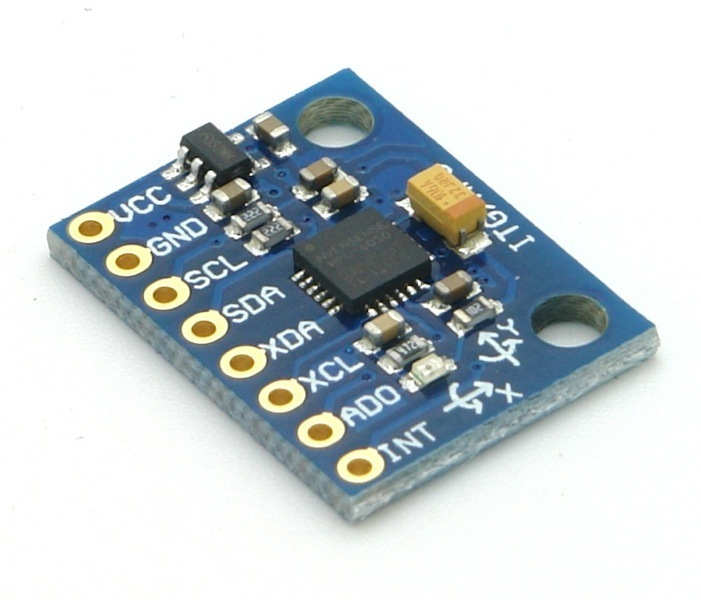

I wrote some code which is in the repository to record g-forces on a MPU6050 and a Raspberry PI. It worked howeverI felt the initial results were extremely noisy. Also the Raspberry Pi Zero Wireless I was using was not fast enough to provide the resolution in terms of readings per second. Development on the Raspberry Pi was also clunky due to the processing speed / IDE etc. I wanted to find another way to get the data.



**FEB 2021 - CREATED A SIMULATION TO PRODUCE TEST DATA AND TRAING A MODEL**

I created a simulation to model a skater on a transition. I thought I might be able to prove the concept in a model and train my AI using a simulator. I was able to model pumping manually, but it was very unstable. Once again I was learning and stuggling some other tools (pygame and pymunk - which are excellent, but I am not an expert). I decided to focus on the real thing instead. I did learn a lot in the process.

[Link to video showing my skateboard pumping physics demonstrator](https://youtu.be/jhdZiSNuQ-Q)

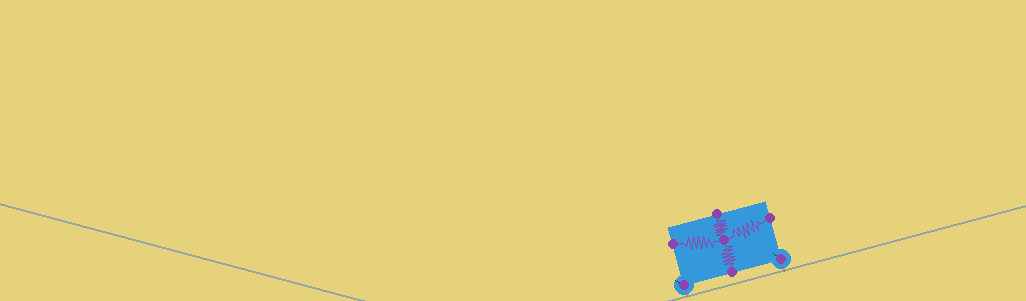

Links to related Kaggle pages and Github below

[Notebook will generate 'sample' data (two sine wavez offset by a time period)](https://www.kaggle.com/code/iainmcintosh/project-pump-dataframe-format-and-sample-data)

[Notebook automatically labels the start of each new cycle, which will enable timing of the cycle length ~ target (y)](https://www.kaggle.com/code/iainmcintosh/project-pump-labeled-cycles)

[Notebook labels cycles and calculates the cycle time which is the target (y)](https://www.kaggle.com/code/iainmcintosh/project-pump-target-measurement-and-creation)

[Analysis of real-time streamed data from two cell phones using a wireless hotspot and a surfskate](https://www.kaggle.com/code/iainmcintosh/project-pump-eda-on-accel-sensor-data)

[Analysis of real-time streamed data from two cell phones using a wireless hotspot and a skateboard in a skate park](https://www.kaggle.com/code/iainmcintosh/project-pump-real-world-data-from-a-skate-park)

[Link to document showing the physical setup and intended use](https://github.com/iainonline/ProjectPump/blob/1f6ab04dbaa8a1696d485a0744ae14403aedcd34/howdoesitwork.pdf)

[Github](https://github.com/iainonline/projectpump)